<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_findKCore_tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [315]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
import seaborn as sns


# Importa datos

In [316]:
df = pd.read_csv('https://raw.githubusercontent.com/Jorge2018/RepositorioArchivos/main/cust_seg.csv')
df =df.drop(columns=['Unnamed: 0','Customer Id'])
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [317]:
df['rangeAge'] = pd.cut(x=df['Age'], bins=[15,20,25,30,35,40,45,50,55,60],labels=[1,2,3,4,5,6,7,8,9]) 
df['rangeYearsEmployed'] = pd.cut(x=df['Years Employed'], bins=[-1,0,3,6,9,12,15,18,21,24,27,30,33,36],labels=[1,2,3,4,5,6,7,8,9,10,11,12,13])
df[['rangeAge']] = df[['rangeAge']].apply(lambda col:pd.Categorical(col).codes)
df[['rangeYearsEmployed']] = df[['rangeYearsEmployed']].apply(lambda col:pd.Categorical(col).codes)
df['rangeYearsEmployed']=df['rangeYearsEmployed'].astype(float)
df['rangeAge']=df['rangeAge'].astype(float)
df['Edu']=df['Edu'].astype(float)
df['Income']=df['Income'].astype(float)
del df['Age']
del df['Years Employed']

*Se eliminan las cols 'Unnamed: 0','Customer Id', ya que no tienen ninguna influencia en los datos*

# Visualizacion de Datos

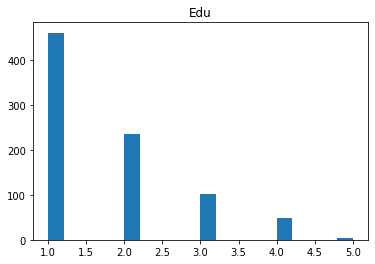

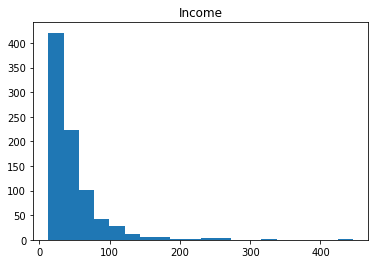

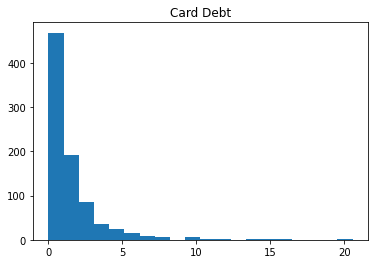

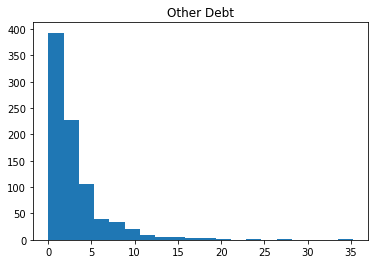

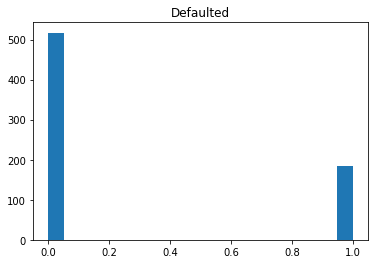

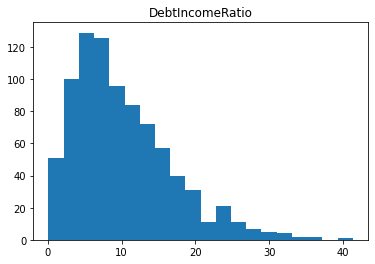

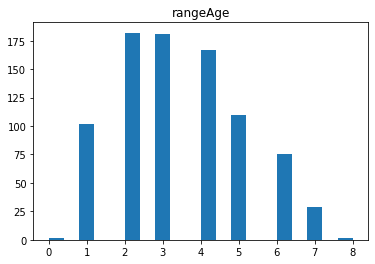

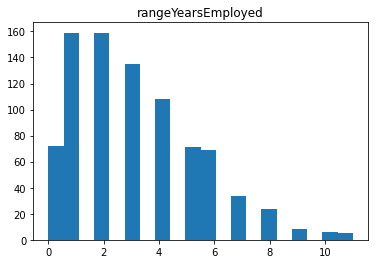

Se puede observar una correlacion mas directa entre los ingresos (Income) y Años en el empleo (Years Employeed)



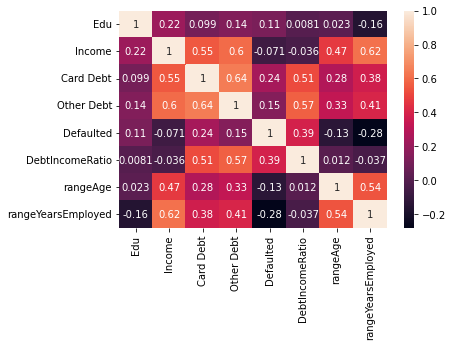

In [318]:
lista=list(df.columns)
for idx, column in enumerate(lista):    
    fig = plt.figure()        
    ax1 = fig.add_subplot(1,1,1)
    ax1.hist(df[column], bins=20)
    ax1.set_title(column)    
    plt.show()
idx = len(df) 
cols = df.columns
corr = df.corr() 
sns.heatmap(corr, annot = True) 
print('Se puede observar una correlacion mas directa entre los ingresos (Income) y Años en el empleo (Years Employeed)\n')

*Podemos ver que el rango de edad de la muestra va desde los 19/20 a los 57/58 aprox, con un peak en las edades de entre 29/32*

*Podemos ver que la mayoria de la muestra tiene educacion con ID 1*

*Podemos ver que el rango de años trabajando de la muestra va desde los 0/33 aprox, con un peak entre los 0/2 años trabajando*

*Podemos ver que el rango de ingresos de la muestra va desde los 0/450 aprox, con un peak de ingresos entre los 0/35 aprox*

*Podemos ver que el rango de tarjetas de debito de la muestra va desde los 0/23 aprox, con un peak de tarjetas entre los 0/2 aprox*

*Podemos ver que el rango de otras tarjetas de debito de la muestra va desde los 0/38 aprox, con un peak de tarjetas entre los 0/2 aprox*

*Podemos ver que la mayoria de la muestra tiene un incumplimiento con ID 0*

*Podemos ver que el rango de DebtIncomeRatio de la muestra va desde los 0/43 aprox, con un peak de entre los 5/8 aprox*


# Exploracion de Datos


In [319]:
df.duplicated()
df = df.drop_duplicates()
print('la cantidad de registros sin duplicados es:\n',df.count())
print('---------------------------')
print('los datos faltantes del df son:\n',df.isna().sum())
print('---------------------------')
print('los tipos de datos son:\n')
df.info()
print('---------------------------')
df.describe().round(3)

la cantidad de registros sin duplicados es:
 Edu                   850
Income                850
Card Debt             850
Other Debt            850
Defaulted             700
DebtIncomeRatio       850
rangeAge              850
rangeYearsEmployed    850
dtype: int64
---------------------------
los datos faltantes del df son:
 Edu                     0
Income                  0
Card Debt               0
Other Debt              0
Defaulted             150
DebtIncomeRatio         0
rangeAge                0
rangeYearsEmployed      0
dtype: int64
---------------------------
los tipos de datos son:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edu                 850 non-null    float64
 1   Income              850 non-null    float64
 2   Card Debt           850 non-null    float64
 3   Other Debt          850 non-null    float64
 

,Edu,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,rangeAge,rangeYearsEmployed
count,850.000,850.000,850.000,850.000,700.000,850.000,850.000,850.000
mean,1.711,46.675,1.577,3.079,0.261,10.172,3.407,3.176
std,0.928,38.543,2.126,3.399,0.440,6.719,1.633,2.296
min,1.000,13.000,0.012,0.046,0.000,0.100,0.000,0.000
25%,1.000,24.000,0.382,1.046,0.000,5.100,2.000,1.000
50%,1.000,35.000,0.885,2.003,0.000,8.700,3.000,3.000
75%,2.000,55.750,1.898,3.903,1.000,13.800,5.000,5.000
max,5.000,446.000,20.561,35.197,1.000,41.300,8.000,11.000


In [320]:
X=df[['Income','Card Debt']]

# Instancia scaler y aplica escala en df

In [321]:
num_selector = make_column_selector(dtype_include='number')

## Instanciar transformadores SimpleImputer
# Imputers
mean_imputer = SimpleImputer(strategy='mean')

# Scaler
scaler = StandardScaler()

## **Instanciar el pipeline**
numeric_pipe = make_pipeline(mean_imputer, scaler)

## **Asignacion de tupla e instanciacion de ColumnTransformer**
number_tuple = (numeric_pipe, num_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple)

# fit on train
preprocessor.fit(X)
# transform train and test
dfprocessed = preprocessor.transform(X)




In [322]:
print(np.isnan(dfprocessed).sum().sum(), 'valores perdidos en la data')
print('\n')
print('Todos los datos procesados del df son del tipo:', dfprocessed.dtype)
print('\n')
print('shape de los datos son', dfprocessed.shape)

0 valores perdidos en la data


Todos los datos procesados del df son del tipo: float64


shape de los datos son (850, 2)


In [323]:
# Entrenamiento de K-Means
from sklearn.cluster import KMeans

k = 3 # Este es el número de agrupaciones (nuestro supuesto)
kmeans = KMeans(n_clusters=k)
# OJO, no es que nos falte la división en training y test. NO es necesaria en este caso.
kmeans.fit(X)

y_pred = kmeans.predict(X)



# Metodo del Codo

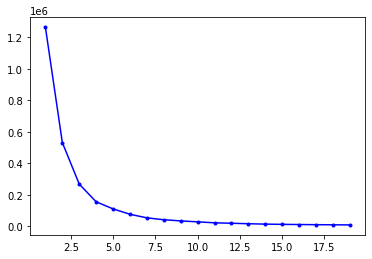

In [326]:
score = []
k_clusters = range(1,20) # Este range va de 1 a 20
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(-kmeans.score(X))
    
plt.plot(k_clusters, score,'b.-')


# Agrupamiento Jerárquico

Algoritmo que define jerarquía en los datos para generar agrupaciones

Agrupamiento aglomerativo: A partir de los datos individuales, se agrupan gradualmente hasta formar uno o mútiples grandes grupos. Aproximación bottom up.
Agrupamiento divisional: A partir de los datos agrupados, se dividen gradualmente hasta formar mútiples grupos pequeños. Aproximación Up bottom



In [328]:
from sklearn.cluster import AgglomerativeClustering

# Escalamiento "puede" mejorar clusterings generados
# # Escalamiento de datos 
# scaler = StandardScaler()
# # Ajustar y transformar datos
# X_scaled = scaler.fit_transform(X)


agg_cluster = AgglomerativeClustering(n_clusters=3)
y_pred = agg_cluster.fit_predict(X)
print(y_pred)

[0 1 0 0 2 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 2 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

# Dendograma

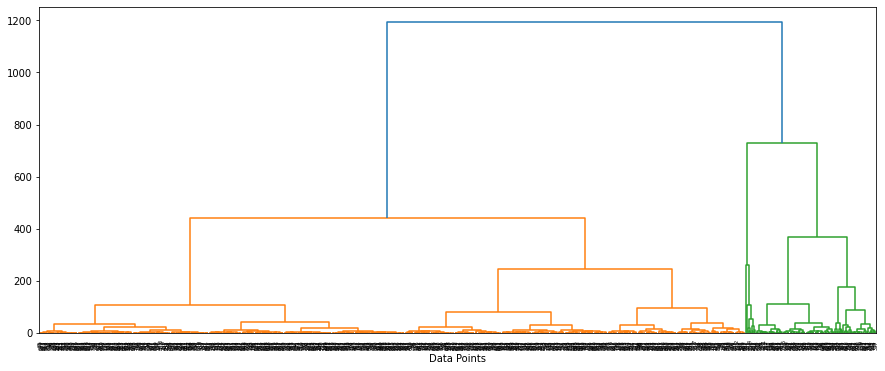

In [331]:
# Dendograma (gráfico de conexiones de agrupamientos)
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

plt.figure(figsize = (15, 6))
sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.xlabel('Data Points');



# DBSCAN

In [332]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=4)
y_pred = dbscan.fit_predict(X)
print(y_pred)

[ 0 -1 -1 -1 -1 -1  1 -1  2 -1 -1  3  2  4  5  6  7  8 -1  9 10 41 -1 -1
 -1 -1 11 -1 -1 12 -1 -1 13 34 -1 14 -1 -1  2 -1 15 -1 -1 -1 -1 -1 15 11
  0 -1 -1 -1 -1 -1 -1 10  5 16 17 -1 -1 -1 -1 -1  5 -1 -1 -1 18 -1 -1 -1
 -1 -1 19 -1 -1 11 -1 -1 -1 -1 -1 13 -1 20 21  6 22 38 -1 -1 11  5 23 -1
 23 35 -1  5 -1 -1 -1 -1 24 -1  9 23 -1 -1 -1 -1 -1 25 18 38  2 -1 -1 16
 11 14  9 -1 -1 -1 -1 10 11  6 26 -1 -1 27 21 -1 -1 -1 32 -1 -1 11  3 18
 -1  4 -1 -1 13 16 28 37 22 11 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 24  9 -1 23
 29 12 -1  5 30 -1 23 -1 -1 24 -1 -1 -1  3 11 -1 -1 -1 29 29 -1 -1 -1 -1
 -1 32 -1  4  6 -1 -1 16 -1 11 -1 11 23 -1 16 -1 -1 27 10 -1 -1 -1 29 25
 -1 -1 12 -1 11 -1 31 27 11 27 -1 32 -1 -1 33 34 -1 -1 -1  2  3 20 -1 35
 30 -1 -1  9 16 -1 -1 -1 12 16 31 28 32 11 -1 -1 -1  0 -1  8 27 -1 -1 -1
 17  3 -1 -1 30 43 29 29  3 -1 10  7 -1 -1 23 30 16 -1 -1 15 -1 29 -1 32
 -1 -1 19 41 27 -1 35 24  5 31 35 -1 -1 17  7 29 -1 -1 -1 -1 36 37  1  7
 24 20 12  7 23 23 -1 18 -1 31 -1 27  6 -1  2  2 -1

TypeError: ignored

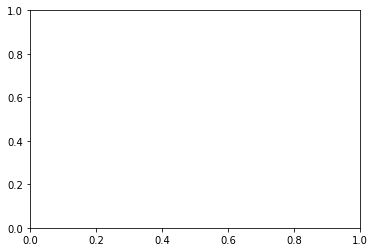

In [334]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[y==0,0],X[y==0,1],'yo')
ax1.plot(X[y==1,0],X[y==1,1],'bs')
ax1.plot(X[y==2,0],X[y==2,1],'g^')
ax1.legend(['Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')

# Índice de agrupación cambia, pero agrupaciones se mantienen
ax2 = fig.add_subplot(1,2,2)
ax2.plot(X[y_pred==-1,0],X[y_pred==-1,1],'r*') # Anomalías
ax2.plot(X[y_pred==0,0],X[y_pred==0,1],'yo')
ax2.plot(X[y_pred==1,0],X[y_pred==1,1],'bs')
ax2.plot(X[y_pred==2,0],X[y_pred==2,1],'g^')
ax2.legend(['Anomalías', 'Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
ax2.set_xlabel('Petal length')
ax2.set_ylabel('Petal width')

plt.show()